In [15]:
from bigraph_viz import plot_bigraph

plot_settings = {}

In [16]:
# !pip install bigraph-viz --upgrade
!pip freeze | grep bigraph-viz

bigraph-viz==0.0.29


In [17]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.plot:

plot_bigraph(bigraph_schema, size='16,10', node_label_size='12pt', show_values=False, show_types=False, collapse_processes=False, port_labels=True, port_label_size='10pt', rankdir='TB', node_border_colors=None, node_fill_colors=None, node_groups=False, remove_nodes=None, invisible_edges=False, mark_top=False, remove_process_place_edges=False, print_source=False, dpi='70', file_format='png', out_dir=None, filename=None)
    Plot a bigraph from bigraph schema.
    
    Args:
        bigraph_schema (dict): The bigraph schema dict that will be plotted.
        size (str, optional): The size of the output figure (example: '16,10'). Default is '16,10'.
        node_label_size (str, optional): The font size for the node labels. Default is None.
        show_values (bool, optional): Display on value info in node label. Default is False.
        show_types (bool, optional): Display on type info in node label. Default is False.
        c

# example 

This example uses a composite specification that has nesting, multiple processes, types and values included.

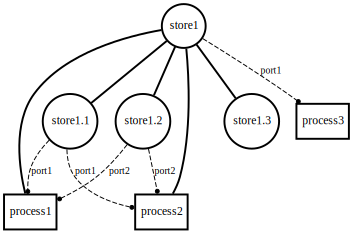

In [18]:
nested_composite_spec = {
    'store1': {
        'store1.1': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'store1.2': {
            '_value': 2, 
            '_type': 'int',
        },
        'store1.3': {
            '_value': 1.1, 
            '_type': 'float',
        },
        'process1': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
        'process2': {
            '_ports': {
                'port1': {'_type': 'type'}, 
                'port2': {'_type': 'type'},
            },
            'wires': {
                'port1': 'store1.1',
                'port2': 'store1.2',
            }
        },
    },
    'process3': {
        'wires': {
            'port1': 'store1',
        }
    }
}
plot_bigraph(nested_composite_spec)

Processes are by default shown with place edges to their outer nodes (see process1 and process2 above). To remove this use `remove_process_place_edges=True`:

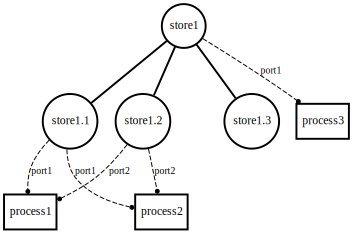

In [19]:
plot_settings['remove_process_place_edges'] = True
plot_bigraph(nested_composite_spec, **plot_settings)

To remove specific nodes from the vizualization, pass in a list of paths to those nodes. In this example the node in path `('store1', 'store1.3')` is removed:

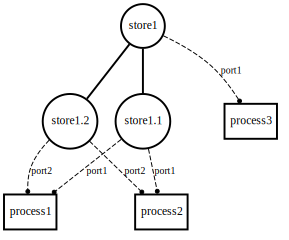

In [20]:
remove_nodes = [
    ('store1', 'store1.3'),
]
plot_settings['remove_nodes'] = remove_nodes
plot_bigraph(nested_composite_spec, **plot_settings)

Remove port labels:

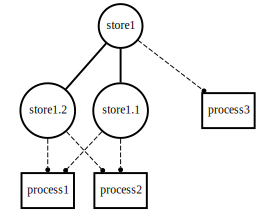

In [21]:
plot_settings['port_labels'] = False
plot_bigraph(nested_composite_spec, **plot_settings)

Change node borders or fill colors

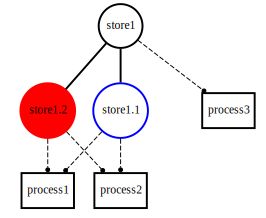

In [22]:
plot_settings['node_border_colors'] = {
    ('store1', 'store1.1'): 'blue',
}
plot_settings['node_fill_colors'] = {
    ('store1', 'store1.2'): 'red',
}
plot_bigraph(nested_composite_spec, **plot_settings)

To group nodes use `node_groups`, A list of lists of grouped node paths, which will be visually placed at the same rank.

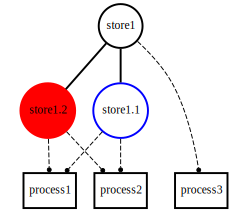

In [23]:
plot_settings['node_groups'] = [
    [('store1', 'process1'), ('store1', 'process2'), ('process3',)]
]
plot_bigraph(nested_composite_spec, **plot_settings)

Change the orientation with `rankdir` using the graphviz orientation key. `'TB'`=top-to-bottom, `'LR'`=left-to-right. By default this is top-to-bottom.

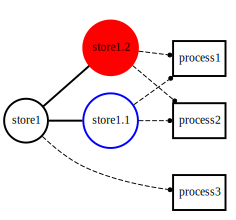

In [25]:
plot_settings['rankdir'] = 'LR'
plot_bigraph(nested_composite_spec, **plot_settings)